In [1]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, neighbors 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/semenfedotov/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
classification_problem = datasets.make_classification(n_samples=100, n_features =2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

In [3]:
# in near future add color_generator

In [4]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

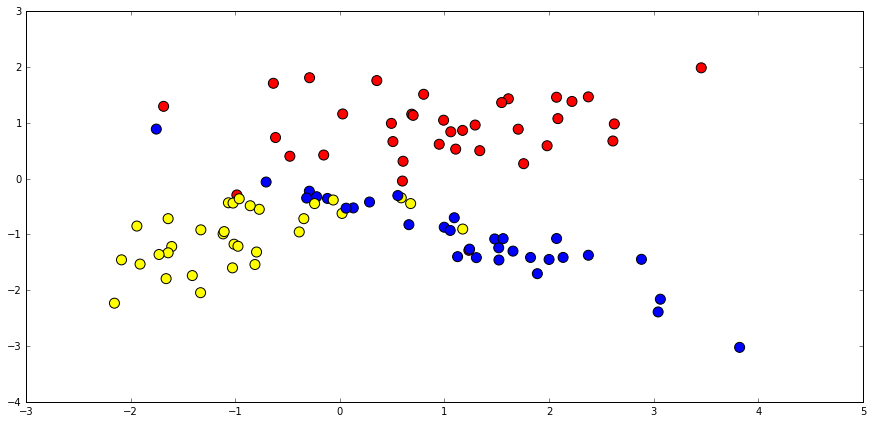

In [5]:
n = 100
plt.figure(figsize=(15,7))
plt.scatter(map(lambda x: x[0], classification_problem[0]), map(lambda x: x[1], classification_problem[0]), 
              c=classification_problem[1], cmap=colors, s=n)
plt.show()

In [6]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))


def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize = (15, 7))
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    plt.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    plt.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

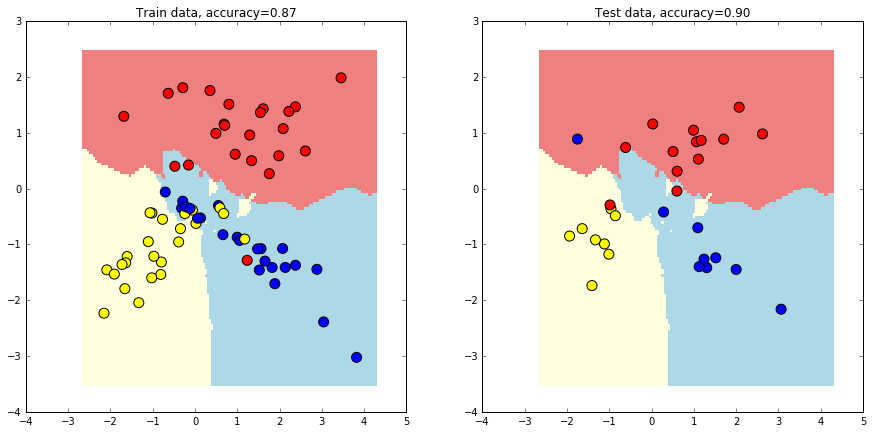

In [7]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)
plot_decision_surface(neighbors.KNeighborsClassifier(), train_data, train_labels, test_data, test_labels)

In [8]:
from tqdm import tqdm

In [9]:
cross_validation.cross_val_score(neighbors.KNeighborsClassifier(3),classification_problem[0],classification_problem[1], cv=5)

array([ 0.86363636,  0.9047619 ,  0.73684211,  0.94736842,  0.84210526])

In [10]:
grid = range(1,21)
scores = []
for k in tqdm(grid):
    current_score = cross_validation.cross_val_score(neighbors.KNeighborsClassifier(k),
                                                     X=classification_problem[0],
                                                     y=classification_problem[1],
                                                     cv=5).mean()
    scores.append(current_score)


100%|██████████| 20/20 [00:00<00:00, 49.62it/s]


In [11]:
print(u'k, на котором достигается максимум --- ' + str(np.argmax(scores) + 1))

k, на котором достигается максимум --- 13


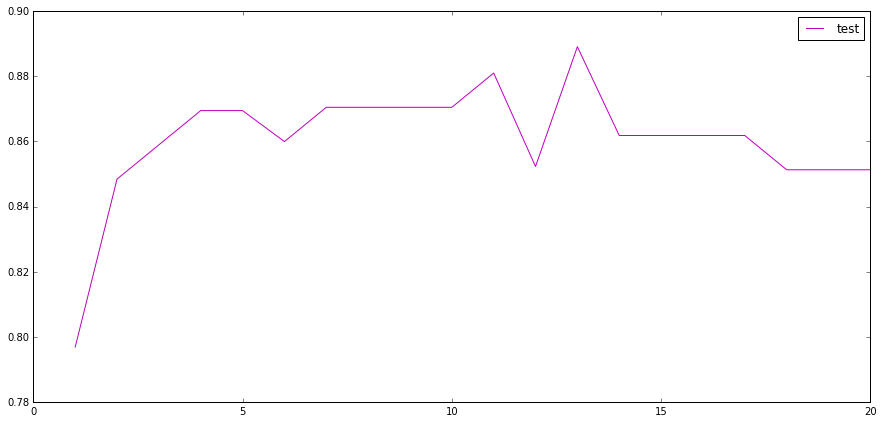

In [12]:
plt.figure(figsize=(15,7))
plt.plot(grid, scores, label='test', color='m')
plt.legend()
plt.show()

# SND Task: Naive Bayes Classifier

In [13]:
digits = datasets.load_digits()
breast_cancer = datasets.load_breast_cancer() 

In [15]:
import random

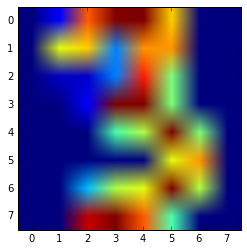

In [24]:
plt.imshow(digits.images[random.randint(0, len(digits.images))])
plt.show()

In [26]:
digits.data[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [27]:
breast_cancer.data[0]

array([  1.79900000e+01,   1.03800000e+01,   1.22800000e+02,
         1.00100000e+03,   1.18400000e-01,   2.77600000e-01,
         3.00100000e-01,   1.47100000e-01,   2.41900000e-01,
         7.87100000e-02,   1.09500000e+00,   9.05300000e-01,
         8.58900000e+00,   1.53400000e+02,   6.39900000e-03,
         4.90400000e-02,   5.37300000e-02,   1.58700000e-02,
         3.00300000e-02,   6.19300000e-03,   2.53800000e+01,
         1.73300000e+01,   1.84600000e+02,   2.01900000e+03,
         1.62200000e-01,   6.65600000e-01,   7.11900000e-01,
         2.65400000e-01,   4.60100000e-01,   1.18900000e-01])

In [28]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [29]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='|S23')

In [30]:
breast_cancer.target_names

array(['malignant', 'benign'], 
      dtype='|S9')

Для лучшего восприятия можно создать pd.DataFrame

In [31]:
import pandas as pd

In [32]:
bc_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
bc_df['target'] = breast_cancer.target
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [33]:
bc_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Для датасета digits сильно смысла нет делать это, там признаки --- пиксели

In [34]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

In [35]:
clf = [BernoulliNB(), MultinomialNB(), GaussianNB()]
nb_scores = []
for classifier in tqdm(clf):
    digi_score = cross_validation.cross_val_score(classifier, digits.data, digits.target).mean()
    bc_score = cross_validation.cross_val_score(classifier, breast_cancer.data, breast_cancer.target).mean()
    nb_scores.append((digi_score, bc_score))   
nb_scores = np.array(nb_scores)

100%|██████████| 3/3 [00:00<00:00, 20.72it/s]


In [36]:
nb_scores

array([[ 0.82582365,  0.6274204 ],
       [ 0.87087715,  0.89457904],
       [ 0.81860038,  0.93674928]])

In [37]:
for ind, score in enumerate(nb_scores):
    print('Score of ' + str(clf[ind])[:str(clf[ind]).find('(')] + ' is === ' + str(score))

Score of BernoulliNB is === [ 0.82582365  0.6274204 ]
Score of MultinomialNB is === [ 0.87087715  0.89457904]
Score of GaussianNB is === [ 0.81860038  0.93674928]


В Двух случаях из 3 модели работают лучше на датасете breast_cancer. Странно вообще полагать, что признаки в digits 

Максимальные значения при классификации для a) digits, b) breast_cancer

In [38]:
def print_name(indices):
    ans = ''
    for index in indices:
        ans += str(clf[index])[:str(clf[index]).find('(')] + ' '
    print ans

In [39]:
print('Максимальные качество классификации:')
print('  digits    breast_cancer')
print(np.max(nb_scores, axis=0))
print_name(np.argmax(nb_scores, axis=0))
print('Целые неотриц., Вещественные')

Максимальные качество классификации:
  digits    breast_cancer
[ 0.87087715  0.93674928]
MultinomialNB GaussianNB 
Целые неотриц., Вещественные


Верными утверждениями являются:

c) Ведь на нем как раз и достигается максимум качества в датасете digits

d) Ведь на нем как раз и достигается максимум качества в датасете breast_cancer

# 3. Метрики в задаче регрессии

Сгенерируйте датасет из 500 точек на плоскости, для которых y = 0.5x + 1 + $\varepsilon$,


где $\varepsilon$ распределено $\mathcal{N}(0, 0.2)$

In [176]:
import random

In [155]:
import random
class ColorGenerator:
    symbols = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    def get_color(self):
        '''
        Returns hex-color(string)
        '''
        color = '#'
        for i in range(6):
            index = 0
            for j in range(1000) :
                index = random.randint(0, 15)
            color += (self.symbols[index])
        return color

col_gen = ColorGenerator()

In [156]:
import scipy.stats as sps

In [157]:
epsila = sps.norm(0, 0.2).rvs(size=575, random_state=2) # вроде бы как раз туда передается sigma^2

In [158]:
all_xs = np.linspace(0, 10, num=575)

In [163]:
good_indices = set(random.sample(xrange(575), 500))

In [165]:
x = np.array([all_xs[i] for i in good_indices])

In [177]:
y = x * .5 + 1 + np.array([epsila[i] for i in good_indices])

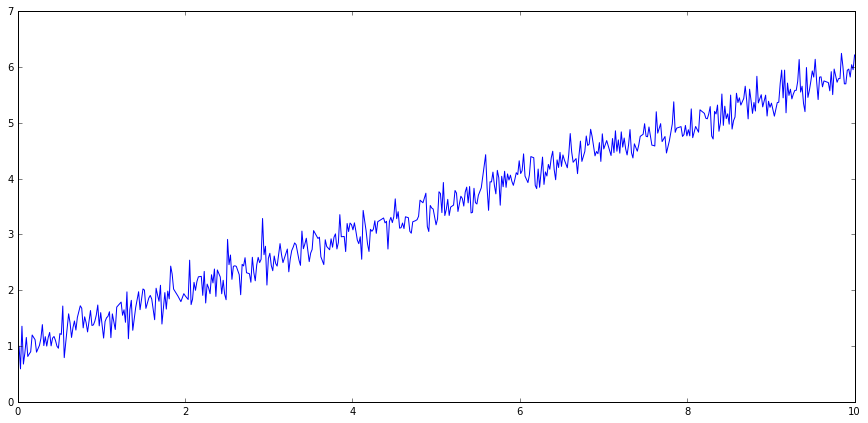

In [178]:
plt.figure(figsize=(15, 7))
plt.plot(x, y)
plt.show()

Воспользуемся методом оптимизации из scipy

In [179]:
import scipy.optimize

In [206]:
def MSE((k,b)):
    y_pred = [k * x_ + b for x_ in x]
    return metrics.mean_squared_error(y, y_pred)

In [205]:
optimizer_results = scipy.optimize.minimize(MSE, x0=(100,3))
optimizer_results

      fun: 0.04366360374555073
 hess_inv: array([[ 0.05907998, -0.29690011],
       [-0.29690011,  1.99197017]])
      jac: array([ -6.05359674e-09,  -9.31322575e-10])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([ 0.49787266,  1.00094777])

In [182]:
top_xs = optimizer_results.x # top
top_xs

array([ 0.49787266,  1.00094775])

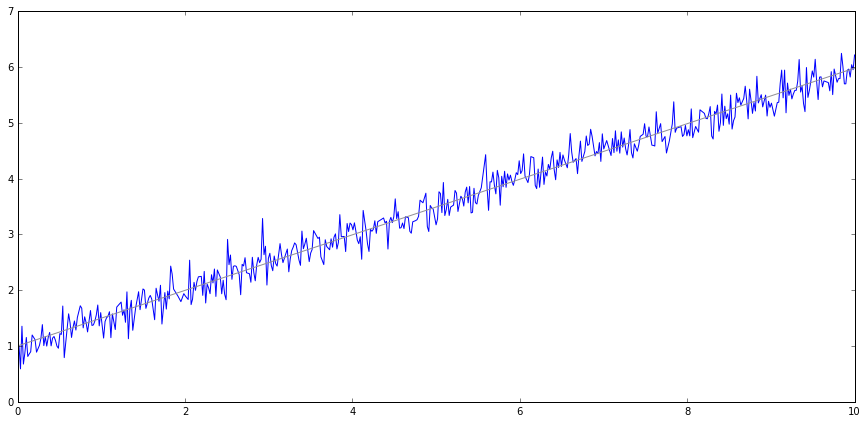

In [183]:
plt.figure(figsize=(15, 7))
plt.plot(x, y)
plt.plot(x, [top_xs[0] * x_ + top_xs[1] for x_ in x], color=col_gen.get_color())
plt.show()

In [184]:
new_x = all_xs

In [196]:
new_y = [0.5 * new_x[i] + 1 + epsila[i] if i in good_indices else -1 + epsila[i] for i in xrange(575)]

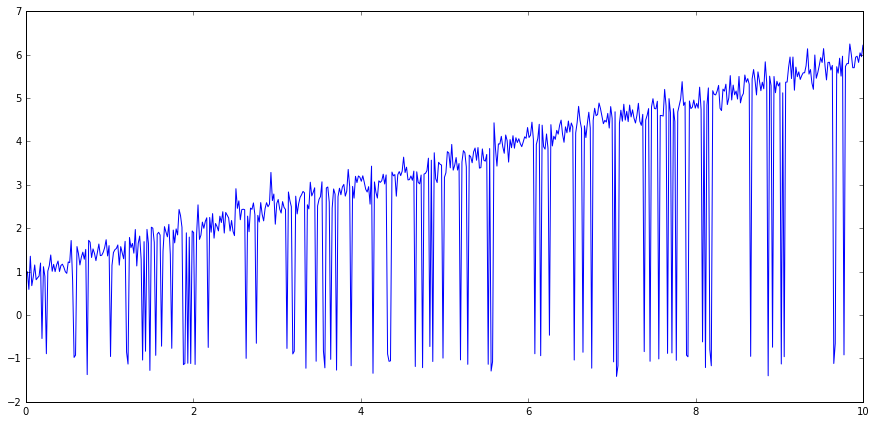

In [201]:
plt.figure(figsize=(15, 7)) # neoch
plt.plot(new_x, new_y)
plt.show()

In [210]:
def MSE_new((k,b)):
    y_pred = [k * x_ + b for x_ in new_x]
    return metrics.mean_squared_error(new_y, y_pred)

In [211]:
new_mse_optimizer_results = scipy.optimize.minimize(MSE_new, x0=(100,1))
new_mse_optimizer_results

      fun: 2.477382421255239
 hess_inv: array([[ 0.059788  , -0.29895808],
       [-0.29895808,  1.9947916 ]])
      jac: array([ -2.98023224e-08,  -2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([ 0.44972765,  0.66663951])

In [212]:
def MAE((k,b)):
    y_pred = [k * x_ + b for x_ in x]
    return metrics.mean_absolute_error(y, y_pred)

In [213]:
new_mae_optimizer_results = scipy.optimize.minimize(MAE, x0=(100,1))
new_mae_optimizer_results

      fun: 0.16532303368694282
 hess_inv: array([[ 0.01044974, -0.06670837],
       [-0.06670837,  0.64035136]])
      jac: array([ 0.02041893,  0.00337363])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 524
      nit: 20
     njev: 128
   status: 2
  success: False
        x: array([ 0.49711255,  0.99697876])

In [214]:
mae_res = new_mae_optimizer_results.x
mse_res = new_mse_optimizer_results.x

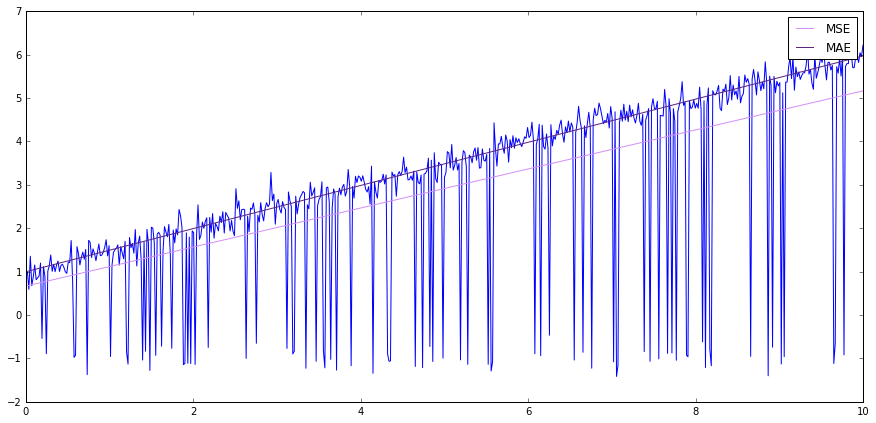

In [215]:
plt.figure(figsize=(15, 7))
plt.plot(new_x, new_y)
plt.plot(new_x, [mse_res[0] * x_ + mse_res[1] for x_ in new_x], color=col_gen.get_color(), label='MSE')
plt.plot(new_x, [mae_res[0] * x_ + mae_res[1] for x_ in new_x], color=col_gen.get_color(), label='MAE')
plt.legend()
plt.show()

Из графика видно, что МАЕ более устойчив к выбросам, что и ожидалось. Ведь в MSE, ошибка зависит квадратично от расстояния(будет сильно штрафовать выбросы)

# Theoretical tasks

# 1 Task
Покажите, что если в наивном байесовском классификаторе классы имеют одинаковые апри-
орные вероятности, а плотность распределения признаков в каждом классе имеет вид (x(k)|y) ~ $\mathcal{N}(\mu_{yk}, \sigma^2)$  признаки объекта x классификация сводится к отнесению объекта x к классу y, центр которого $\mu_y$ ближе всего к x.

$\blacktriangle $ В чем вообще заключается байесовский классификатор: Мы отнесем х к тому классу y: y = $argmax_{_y}p(x | y)p(y)$. Ну так как у нас априорные вероятнсти совпадают, то множитель p(y) можно откинут: он не влияет на аргмакс. Получаем следующее : y = $argmax_{_y}p(x | y)$, где $p(x | y)$ - правдоподобие выборки(вектора х). Ну а так как у нас действует наивное предположение, то $p(x | y)$ будет равно произведению плотностей компонент. Тогда максимум будет и вправду будет достигаться на ближайшем центре, ибо нам нужно максимизировать $-\sum{(x^{(k)} - \mu_{yk})^2}$(так как это показатель экспоненты, а она монотонна , то прологарифмируем, получим тоже монотонную функцию), а это эквивалентно минимизации $\sum{(x^{(k)} - \mu_{yk})^2}$ чтобы $x^{(k)} $, а это и есть квадрат расстояния до центра, просто расписанный покомпонентно. \blacksquare$

# 2 Task


$\blacktriangle$ 
То что нужно доказать эквивалентно тому, то в среднем третья точка лежит на диагонали


В данном случае можно использовать такой метод(я не ищу матожидание площади, а площадь от матожидания ТПР и ФПР(что в этой задаче эквивалентно))

Итак, у нас есть две точки нашей кривой: (0, 0) и (1,1). Осталось найти координаты третьей, чтобы посчитать площадь.

Пусть у нас дана выборка размера n, где n = r + (n - r), r - нулей, (n - r) - единиц. Возьмем нашему алгоритму подадим на вход сначала набор всех нулей, а потом набор всех единиц. Чтобы найти FPR и TPR, нужно найти E(числа единиц, выданных алгоритмом) на первом(FPR) и втором(TPR) входах. Так как сам алгоритм представляет из себя $\sim Bern(p)$, то число единиц == $\sum\limits \xi_i \sim Bin(k,p). E(Bin(n,p)) = n \cdot p$ Т.е E(числа единиц на первом входе) = $r \cdot p$ и E(числа единиц на втором входе) = $(n - r) \cdot p$. Чтобы получить из этих чисел среднее для FPR & TPR, надо поделить на кол-во нулей и кол-во единиц в выборке соответственно. Итого: $$FPR = \frac{r \cdot p}{r}, \\ TPR = \frac{(n - r) \cdot p}{n - r}$$ Т.е координаты третьей точки равны: $(p, p)$. А значит, она лежит на диагонали и площадь под графиком равна $\frac{1}{2}$, ЧТД.

$\blacksquare$

# 3 Task

$P(y \neq y_n) = / \text{ Ф-ла полной вероятности + независимость классов для x и } x_n / = P(1 \mid x)P(0 \mid x_n) + P(0 \mid x)P(1 \mid x_n)$ Сделаем предельный переход в этом рав-ве, так как размер выборки стремится к бесконечности(а тут у нас максимальное расстояние до ближайшего соседа стремится к нулю), то $x_n \to x, y_n \to y$ Итого получаем: 
$$P(y \neq y_n) =  P(1 \mid x)P(0 \mid x) + P(0 \mid x)P(1 \mid x) = 2 \cdot  P(1 \mid x)P(0 \mid x) = 2\cdot p \cdot q; p + q = 1$$. А для опт Байеса $\min(p, q)$ То есть осталось доказать, что $pq <= min(p, q)$, что очевидно, т.к. $p,q \in [0, 1]$